## Read the dataset from the below URL: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv

1. List of programming languages and technologies: languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

2. What programming languages and technologies are required at Amazon from the above list?(using BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns)
3. Programming Languages Popularity at Amazon: Extract the count of each programming language and visualize it through a bar plot [ On X Axis→ Programming languages ] [ On Y-axis→ Frequency of Programming Languages]

###Visualize the job locations through a plot.(Consider only the locations which are repeating more than 10 times)

### degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"] Popularity of Academic Degree at Amazon : Which degrees are most asked at Amazon from the above degree_list? Make a plot to visualize Degree and its Popularity

In [6]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import re
%matplotlib inline

In [7]:
df_job_description = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv')
df_job_description.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [8]:
#list of programming langauages and technologies
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

## Question 1:

In [9]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a list
qualifications = df_job_description['BASIC QUALIFICATIONS'].tolist()+df_job_description['PREFERRED QUALIFICATIONS'].tolist()
# joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [10]:
wordcount = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [11]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [12]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

In [13]:
df_popular_programming_lang

,Language,Popularity
17,Cosmos,1
16,Pig,13
15,Mongodb,19
14,Matlab,24
13,Objectivec,55
12,Swift,56
11,Php,60
10,Mysql,74
9,Spark,148
8,Hadoop,219


## Question 2:

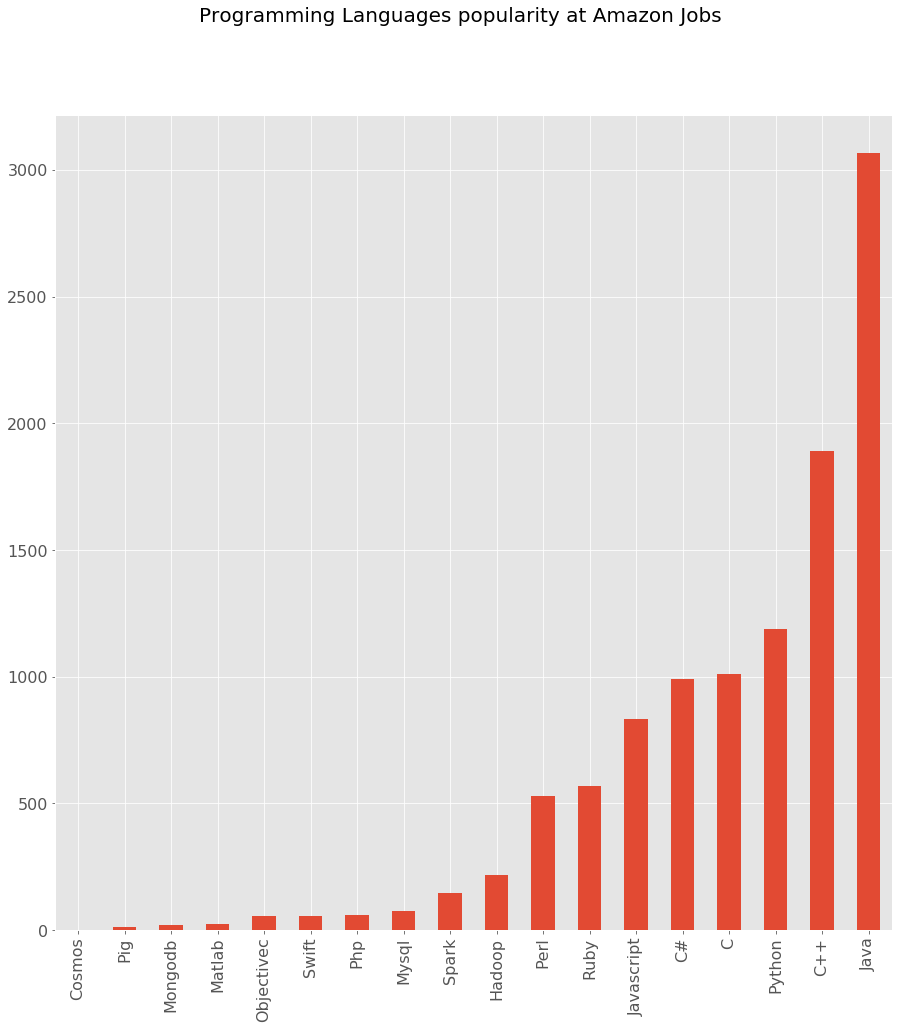

In [14]:
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)
plt.suptitle("Programming Languages popularity at Amazon Jobs", fontsize=20)
plt.xlabel("")
# change xticks fontsize to 14
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()

## Question 3:

In [15]:
# where is most job located
threshold = 10
location_value_counts = df_job_description.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
df_job_description['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = df_job_description.location.value_counts()
location_value_counts = location_value_counts[::-1]

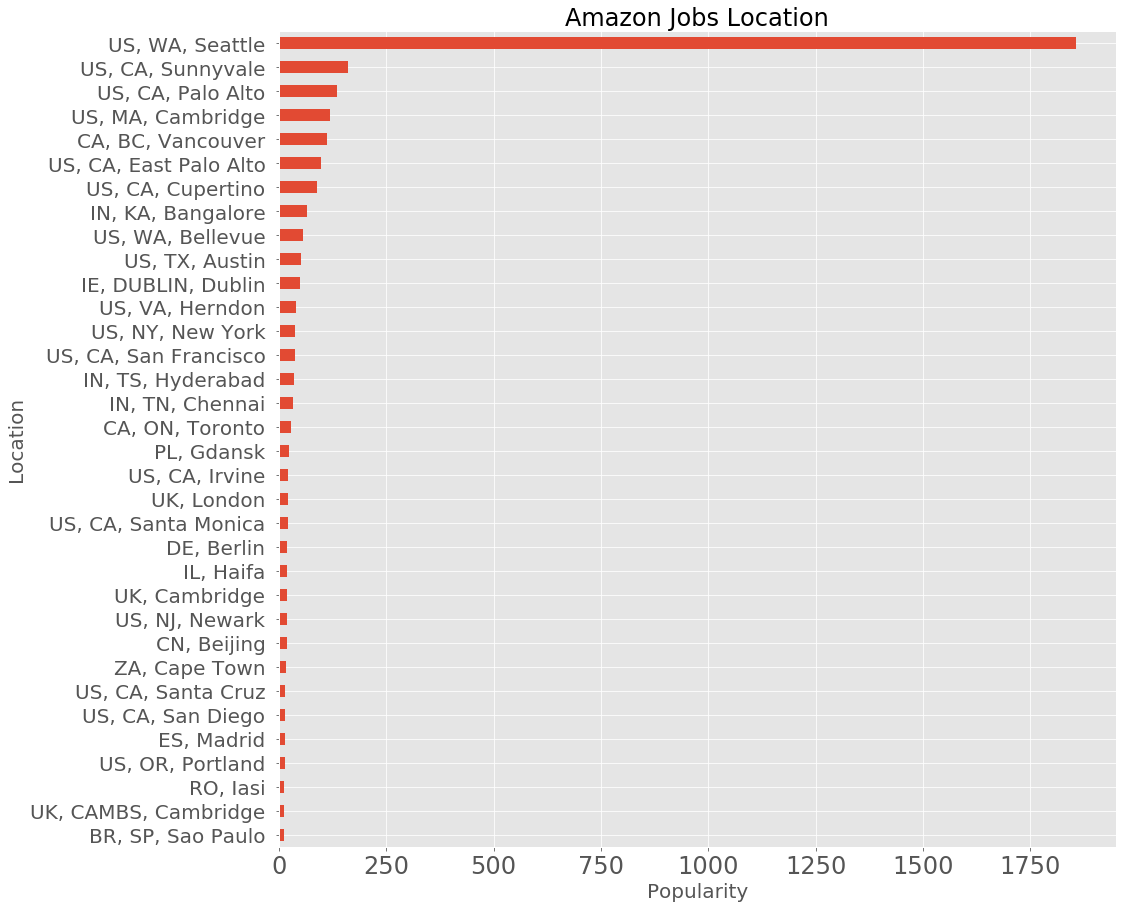

In [16]:
location_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("Amazon Jobs Location", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
# finally show the plot
plt.show()

## Question 4:

In [17]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a string
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [18]:
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

In [19]:
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", basic_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


In [20]:
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [21]:
df_degree_popular = pd.DataFrame(degree_wanted,columns=['Degree','Popularity'])
df_degree_popular

,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


In [22]:
num=list([('Bachelor of Science',1471),('Master of Science',850),('PhD',489),('BA',2)])
df_degree_popular = pd.DataFrame(num,columns=['Degree','Popularity'])
df_degree_popular

,Degree,Popularity
0,Bachelor of Science,1471
1,Master of Science,850
2,PhD,489
3,BA,2


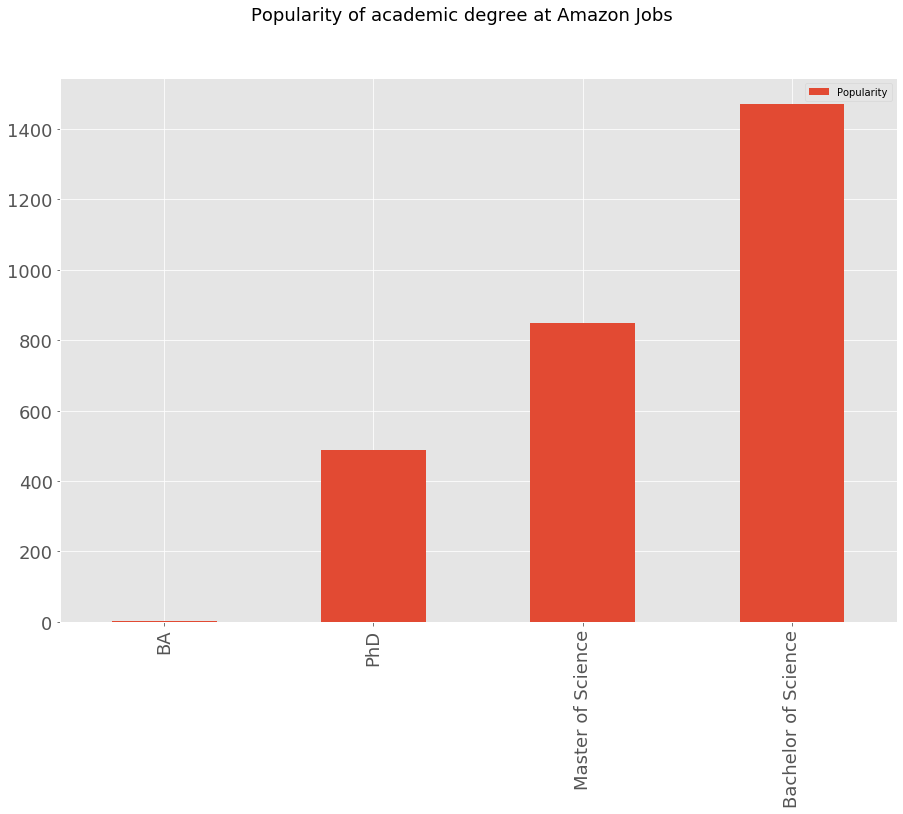

In [23]:
df_degree_popular = df_degree_popular[::-1] 
df_degree_popular.plot.bar(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)
plt.xlabel("")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()